
# Diabetes Health Indicators Dataset

The purpose of this code notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The dataset is from kaggle. This project will be using only the diabetes_binary_5050split_health_indicators_BRFSS2015.csv. This is a clean dataset of 70692 survey responses to CDC's BRFSS2015. It has a 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classs. 0 is for no diabetes and 1 is for prediabetes or diabetes. It has 22 feature variables and is balanced.

Based on the diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.

Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease. The following are the selected subset of features from BRFSS 2015.

- diabetes binary (0 = no diabetes; 1 = prediabetes/diabetes)
- high blood pressure (0 = no high BP; 1 = high BP)
- high cholesterol (0 = no high cholesterol; 1 = high cholesterol)
- cholesterol check (0 = no choesterol check in 5 years; 1 = yes cholesterol check in 5 years)
- BMI (body mass index)
- smoker (smoke at least 100 cigarettes in entire life; 5 packs = 100 cigarettes; 0 = no; 1 = yes)
- stroke (ever told had a stroke; 0 = no; 1 = yes)
- heart disease or attack (coronary heart disease(CHD) or myocardial infarction(MI); 0 = no; 1 = yes)
- physical activity (in past 30 days not including job; 0 = no; 1 = yes))
- fruits (consumed 1 or more times per day; 0 = no; 1 = yes)
- veggies (consumed 1 or more times per day; 0 = no; 1 = yes)
- heavy alcohol consumption (adult men =>14 drinks per week; adult women =>7 drinks per week; 0 = no; 1 = yes)
- any healthcare (any kind of healthcare coverage including health insurance, prepaid plans (HMO etc); 0 = no; 1 = yes)
- no doctor because of cost (past 12 months when needed to see doctor but could not because of cost; 0 = no; 1 = yes)
- general health (general health 5 scale; 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor)
- mental health (days of poor mental health 1-30 days)
- physical health (physical illness or injury days in past 30 days scale of 1-30)
- difficulty walking (have serious difficulty walking or climbing stairs; 0 = no; 1 = yes)
- sex (0 = female; 1 = male)
- age (14 level age category; 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80 or>; 14 = not know/not sure/refused/missing)
- education (scale 1-6, 9); 1 = never attended school or only kindergarten; 2 = elementary; 3 = some high school; 4 = high school graduate; 5 = some college; 6 = college graduate or more; 9 = refused)
- income (scale 1-8; 1 = <10K; 2 = <15K; 3 = <20K; 4 = <25K; 5 = <35K; 6 = <50K; 7 = <75K; 8 = >75K or more; 77 = not know/not sure; 99 = refused)
  
The selected subset of features (columns from the dataset) from BRFSS 2015 was further investigated for additional information in order to understand the meaning of the data gathered from the BRFSS 2015 codebook from the survey.

Additional information about the BRFSS 2015 codebook and relevant paper are as follows:

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.html

## Data Wrangling

### Data Collection:
__Goal:__ Organize the data to streamline the next steps of the capstone project.<br>
__Performed:__ Data loading

### Data Organization:
__Goal:__ Create the file structure and add the work project to the GitHub repository created for this project.<br>
__Performed:__ A file structure was created in GitHub for repository for this capstone project and glob library also downloaded for the project.

### Data Definition:
__Goal:__ Gain an understanding of the data features to inform the next steps of the project.<br>
__Performed:__ Check the column names, data types, described the columns, counts, percents of unique values, ranges of the values.
    
### Data Cleaning:
__Goal:__ Clean up the data in order to prepare it for the next steps of the project.<br>
__Performed:__ Checking for missing values, NaN values, duplicates, using appply(), nunique(), .isnull().values.any()
    

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import glob
import random
random.seed(1)
import matplotlib.pyplot as plt

This is the best place to put all the libraries needed for the project.

In [2]:
#read in the dataset (select 2015)
brfss2015_dataset = pd.read_csv('BRFSSdata/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

The dataset is imported from the source: kaggle using the pd.read_csv.

In [3]:
#check the head of the transposed dataframe
brfss2015_dataset.head().T

,0,1,2,3,4
Diabetes_binary,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,1.0,0.0,1.0,0.0
HighChol,0.0,1.0,0.0,1.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,26.0,26.0,26.0,28.0,29.0
Smoker,0.0,1.0,0.0,1.0,1.0
Stroke,0.0,1.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,1.0,0.0,1.0,1.0,1.0
Fruits,0.0,1.0,1.0,1.0,1.0


Check to see the top 5 of the dataset.

In [4]:
#call the  info method on brfss2015_dataset to see a summary of the data and the datatypes present
brfss2015_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

These are floats and could be integers since the data are already categorized;
This gives a summary of the info in the dataset.

In [5]:
#find out the shape of the data to determine the number of rows and columns
brfss2015_dataset.shape

(70692, 22)

This gives a better picture of the number of rows and columns of the dataset.

In [6]:
# print out the columns of the datatset
brfss2015_dataset.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

This concisely showed the names of the columns in the dataset and easy indexing if needed.

In [7]:
#we can also find what datatypes the data has by calling .dtypes
brfss2015_dataset.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Confirmed the datatypes present in the dataset.

In [8]:
#calling the describe method gives you a descriptive statistics summary of the data; 
#easier to view since less columns for the stats data therby called in transpose method
brfss2015_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


These gives a descriptive statistical summary of the dataset.

In [9]:
brfss2015_dataset.isnull().values.any()

False

Shows there are no missing values in the dataset.

In [10]:
#find out the number of missing values using .isnull() in each of the column
#find out the percentages using mean 
#present a table with column names of count and percentages
missing =pd.concat([brfss2015_dataset.isnull().sum(), 100* brfss2015_dataset.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count', '%'])

,count,%
Diabetes_binary,0,0.0
HighBP,0,0.0
HighChol,0,0.0
CholCheck,0,0.0
BMI,0,0.0
Smoker,0,0.0
Stroke,0,0.0
HeartDiseaseorAttack,0,0.0
PhysActivity,0,0.0
Fruits,0,0.0


This is another way to confirm that there are no missing data in any of the columns.

In [11]:
#call in .nunique() method to return the number of uniques values for each column of the dataset
brfss2015_dataset.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

Shows that number of unique values in each column.

In [12]:
brfss2015_dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

No duplicates found in the dataset.

In [13]:
#use replace NaN with empty string using replace()function [df.replace(np.nan, '' or '-')]
data = brfss2015_dataset.apply(pd.value_counts).T
data.replace(np.nan, '-')

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,82.0,83.0,84.0,85.0,86.0,87.0,89.0,92.0,95.0,98.0
Diabetes_binary,35346.0,35346.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighBP,30860.0,39832.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighChol,33529.0,37163.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
CholCheck,1749.0,68943.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
BMI,-,-,-,-,-,-,-,-,-,-,...,11.0,1.0,13.0,1.0,1.0,13.0,4.0,9.0,4.0,4.0
Smoker,37094.0,33598.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Stroke,66297.0,4395.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HeartDiseaseorAttack,60243.0,10449.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
PhysActivity,20993.0,49699.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Fruits,27443.0,43249.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


NaN values or '-' are not applicable, most of the values are 0 and 1 representing yes/no values.

In [14]:
#total number of male=1; female=0; diabetes=2
percent = pd.concat([brfss2015_dataset.value_counts(subset='Diabetes_binary'), 
           brfss2015_dataset.value_counts(subset='Diabetes_binary')/
           brfss2015_dataset.value_counts(subset='Diabetes_binary').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
Diabetes_binary,,
0.0,35346,50.0
1.0,35346,50.0


Shows that there is a 50-50 split of people without and with diabetes in the survey.

In [15]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HighBP'), 
           brfss2015_dataset.value_counts(subset='HighBP')/
           brfss2015_dataset.value_counts(subset='HighBP').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
HighBP,,
0.0,30860,43.654162
1.0,39832,56.345838


There are 56.35% of people with high BP and 43.65% of people who do not have high BP.

In [16]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HighChol'), 
           brfss2015_dataset.value_counts(subset='HighChol')/
           brfss2015_dataset.value_counts(subset='HighChol').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
HighChol,,
0.0,33529,47.429695
1.0,37163,52.570305


There are 52.57% of people with high cholesterol and 47.43% of people who do not have high cholesterol.

In [17]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='CholCheck'), 
           brfss2015_dataset.value_counts(subset='CholCheck')/
           brfss2015_dataset.value_counts(subset='CholCheck').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
CholCheck,,
0.0,1749,2.474113
1.0,68943,97.525887


There are 97.53% of people who had their cholesterol check in the past 5 years and 2.47% of people who did not have their cholesterol check in the last 5 years.

In [18]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='BMI'), 
           brfss2015_dataset.value_counts(subset='BMI')/
           brfss2015_dataset.value_counts(subset='BMI').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False).head(10)

,count,%
BMI,,
27.0,6327,8.950093
26.0,4975,7.037571
28.0,4583,6.483053
24.0,4392,6.212867
30.0,4344,6.144967
29.0,4219,5.968143
25.0,4031,5.702201
31.0,3753,5.308946
32.0,3481,4.924178


Noted BMI of 27 is in the overweight range (25.0 to <30) has the highest value count in BMI.

In [19]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Smoker'), 
           brfss2015_dataset.value_counts(subset='Smoker')/
           brfss2015_dataset.value_counts(subset='Smoker').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
Smoker,,
1.0,33598,47.527302
0.0,37094,52.472698


There are 52.47% who are non-smokers and 47.53% for smokers.

In [20]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Stroke'), 
           brfss2015_dataset.value_counts(subset='Stroke')/
           brfss2015_dataset.value_counts(subset='Stroke').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
Stroke,,
1.0,4395,6.217111
0.0,66297,93.782889


There are 93.78% for people who did not have stroke and 6.22% for people who had a stroke.

In [21]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HeartDiseaseorAttack'), 
           brfss2015_dataset.value_counts(subset='HeartDiseaseorAttack')/
           brfss2015_dataset.value_counts(subset='HeartDiseaseorAttack').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
HeartDiseaseorAttack,,
1.0,10449,14.781022
0.0,60243,85.218978


There are 85.22% of people who do not have any heart disease/attack and 14.78% of people who have heart disease/attack.

In [22]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='PhysActivity'), 
           brfss2015_dataset.value_counts(subset='PhysActivity')/
           brfss2015_dataset.value_counts(subset='PhysActivity').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
PhysActivity,,
0.0,20993,29.69643
1.0,49699,70.30357


There are 70.30% of respondents who performed physical activity and 29.70% who did not.

In [23]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Fruits'), 
           brfss2015_dataset.value_counts(subset='Fruits')/
           brfss2015_dataset.value_counts(subset='Fruits').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
Fruits,,
0.0,27443,38.820517
1.0,43249,61.179483


There are 61.18% of respondents who ate fruits 1 or more times a day and 38.82% for those who did  not.

In [24]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Veggies'), 
           brfss2015_dataset.value_counts(subset='Veggies')/
           brfss2015_dataset.value_counts(subset='Veggies').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
Veggies,,
0.0,14932,21.122616
1.0,55760,78.877384


There are 78.88% of respondents who ate veggies 1 or more times a day and 21.12% for those who did not.

In [25]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='HvyAlcoholConsump'), 
           brfss2015_dataset.value_counts(subset='HvyAlcoholConsump')/
           brfss2015_dataset.value_counts(subset='HvyAlcoholConsump').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
HvyAlcoholConsump,,
1.0,3020,4.272053
0.0,67672,95.727947


There are 95.73% of respondents who did not drink any alcohol and 4.27% for those who did not.

In [26]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='AnyHealthcare'), 
           brfss2015_dataset.value_counts(subset='AnyHealthcare')/
           brfss2015_dataset.value_counts(subset='AnyHealthcare').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
AnyHealthcare,,
0.0,3184,4.504046
1.0,67508,95.495954


There are 95.50% of people with healthcare coverage and 4.50% for those do not have.

In [27]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='NoDocbcCost'), 
           brfss2015_dataset.value_counts(subset='NoDocbcCost')/
           brfss2015_dataset.value_counts(subset='NoDocbcCost').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
NoDocbcCost,,
1.0,6639,9.391445
0.0,64053,90.608555


There are 90.61% of people who are able to go the doctor despite cost and 9.39% who were not able.

In [28]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='GenHlth'), 
           brfss2015_dataset.value_counts(subset='GenHlth')/
           brfss2015_dataset.value_counts(subset='GenHlth').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

,count,%
GenHlth,,
3.0,23427,33.139535
2.0,19872,28.110677
4.0,13303,18.818254
1.0,8282,11.715611
5.0,5808,8.215923


The top three: There are 33.14% of people are in good general health; 28.11% are in very good health and 18.82% are in fair health.

In [29]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='MentHlth'), 
           brfss2015_dataset.value_counts(subset='MentHlth')/
           brfss2015_dataset.value_counts(subset='MentHlth').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False).head(10)

,count,%
MentHlth,,
0.0,48091,68.028914
30.0,4320,6.111017
2.0,3267,4.621456
5.0,2519,3.563345
1.0,2051,2.901318
3.0,1967,2.782493
10.0,1924,2.721666
15.0,1767,2.499576
20.0,1125,1.591411


There are 68.03% had 0 days of poor mental health; 6.11% had 30 days had poor mental health and 4.62% had 2 days of poor mental health.

In [30]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='PhysHlth'), 
           brfss2015_dataset.value_counts(subset='PhysHlth')/
           brfss2015_dataset.value_counts(subset='PhysHlth').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False).head(10)

,count,%
PhysHlth,,
0.0,39915,56.463249
30.0,7953,11.250212
2.0,4102,5.802637
1.0,2853,4.035817
3.0,2438,3.448764
5.0,2332,3.298817
10.0,1980,2.800883
15.0,1913,2.706105
4.0,1376,1.946472


There are 56.46% had 0 days of physical illness or injury; 11.25% had 30 days of physical illness or injury and 5.80% had 2 days of physical illness or injury.

In [31]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='DiffWalk'), 
           brfss2015_dataset.value_counts(subset='DiffWalk')/
           brfss2015_dataset.value_counts(subset='DiffWalk').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
DiffWalk,,
1.0,17866,25.273015
0.0,52826,74.726985


There are 74.73% responded did not have difficulty in walking and 25.27% had difficulty in walking.

In [32]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Sex'), 
           brfss2015_dataset.value_counts(subset='Sex')/
           brfss2015_dataset.value_counts(subset='Sex').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'])

,count,%
Sex,,
1.0,32306,45.699655
0.0,38386,54.300345


There is about male(45.7%) and female(54.3%) respondents to the survey.

In [33]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Age'), 
           brfss2015_dataset.value_counts(subset='Age')/
           brfss2015_dataset.value_counts(subset='Age').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

,count,%
Age,,
10.0,10856,15.356759
9.0,10112,14.304306
8.0,8603,12.169694
11.0,8044,11.378940
7.0,6872,9.721043
13.0,5426,7.675550
12.0,5394,7.630283
6.0,4648,6.575001
5.0,3520,4.979347


There are 15.35% in th age group 65-69; 14.30% are in age group 60-64; 12.17% are in age group 55-59.

In [34]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Education'), 
           brfss2015_dataset.value_counts(subset='Education')/
           brfss2015_dataset.value_counts(subset='Education').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

,count,%
Education,,
6.0,26020,36.807560
5.0,20030,28.334182
4.0,19473,27.546257
3.0,3447,4.876082
2.0,1647,2.329825
1.0,75,0.106094


There are 36.81% are college graduate or more; 28.33% has some college and 27.55% are high school graduate.

In [35]:
percent = pd.concat([brfss2015_dataset.value_counts(subset='Income'), 
           brfss2015_dataset.value_counts(subset='Income')/
           brfss2015_dataset.value_counts(subset='Income').sum()*100], axis=1)
percent.columns=['count','%']
percent.sort_values(by=['count', '%'], ascending=False)

,count,%
Income,,
8.0,20646,29.205568
7.0,11425,16.161659
6.0,10287,14.551859
5.0,8010,11.330844
4.0,6658,9.418322
3.0,5557,7.860861
2.0,4498,6.362813
1.0,3611,5.108074


There are 29.21% are earning >75K or more; 16.16% are earning <75K and 14.55% are earning <50K.

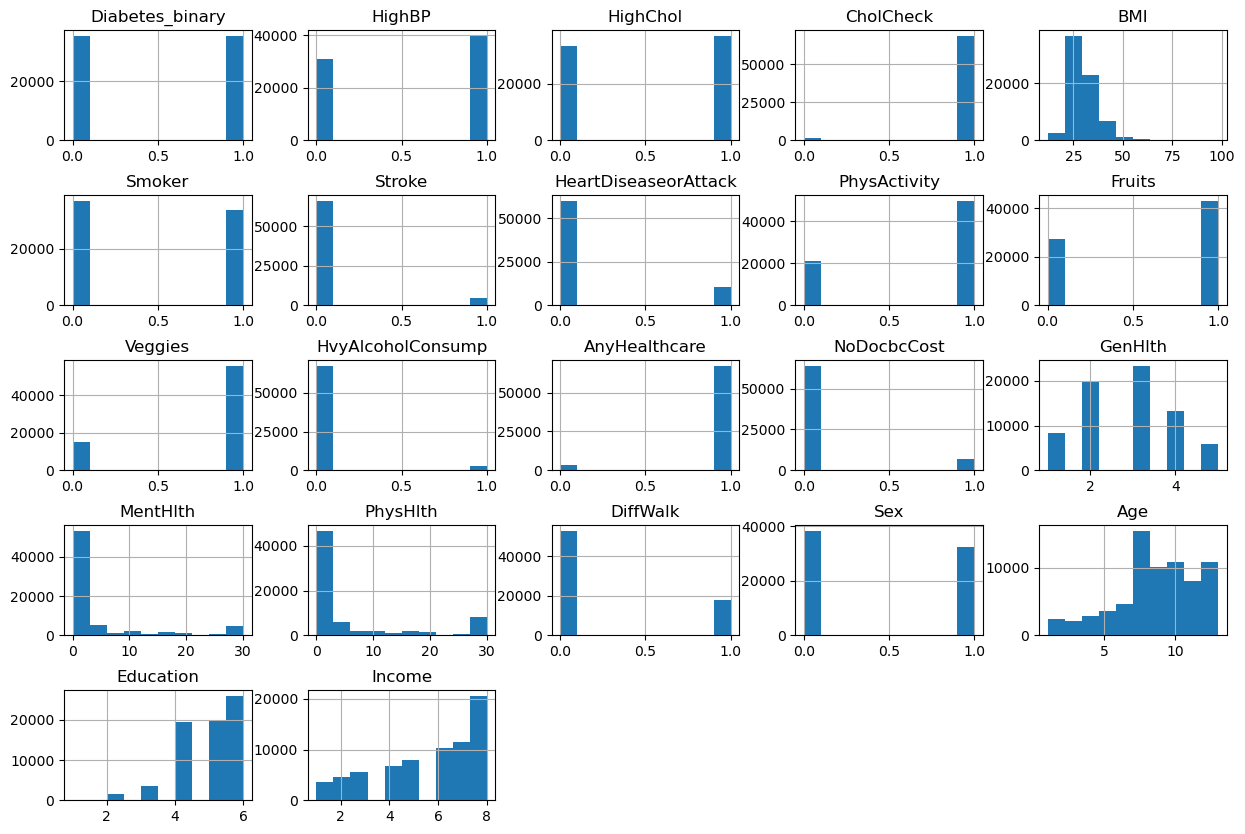

In [36]:
#Call brfss2015_dataset `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
brfss2015_dataset.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Above is a quick overview of the distribution of the columns of the data.

In [37]:
brfss2015_dataset.mean()

Diabetes_binary          0.500000
HighBP                   0.563458
HighChol                 0.525703
CholCheck                0.975259
BMI                     29.856985
Smoker                   0.475273
Stroke                   0.062171
HeartDiseaseorAttack     0.147810
PhysActivity             0.703036
Fruits                   0.611795
Veggies                  0.788774
HvyAlcoholConsump        0.042721
AnyHealthcare            0.954960
NoDocbcCost              0.093914
GenHlth                  2.837082
MentHlth                 3.752037
PhysHlth                 5.810417
DiffWalk                 0.252730
Sex                      0.456997
Age                      8.584055
Education                4.920953
Income                   5.698311
dtype: float64

The only non-categorical data above are BMI, MentHlth and PhysHlt. The average BMI is at the high end of the overweight range, bordering on obesity range. MentHlt averages a little under 4 days. PhysHlth averages a little under 6 days.

In [38]:
brfss2015_dataset.median()

Diabetes_binary          0.5
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     29.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  3.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      9.0
Education                5.0
Income                   6.0
dtype: float64

The data on BMI, MentHlt and PhysHlt are of interest. Median of BMI is 29, which is on the overweight range. The median of MentHLT is 0 days and median of PhysHlt is 0 days.

In [39]:
brfss2015_dataset.mode().T

,0,1
Diabetes_binary,0.0,1.0
HighBP,1.0,NaN
HighChol,1.0,NaN
CholCheck,1.0,NaN
BMI,27.0,NaN
Smoker,0.0,NaN
Stroke,0.0,NaN
HeartDiseaseorAttack,0.0,NaN
PhysActivity,1.0,NaN
Fruits,1.0,NaN


The mode of categorical data is of interest. The most common values seen are high BP, high cholesterol, check cholesterol, non-smoker, no stroke, no heart problems, performs exercises, eats fruits and veggies, not a heavy drinker, has healthcare coverage, does see the doctor independent of cost, in good health, no difficulty walking, predomintly female, 65-69 years old, at least a college graduate, and income of 75K or more. BMI is 27 still indicating overweight. No days of mental and physical health problems.

In [40]:
brfss2015_dataset.set_index('Diabetes_binary').groupby('Diabetes_binary').mean().T

Diabetes_binary,0.0,1.0
HighBP,0.374243,0.752674
HighChol,0.381288,0.670118
CholCheck,0.957336,0.993182
BMI,27.769960,31.944011
Smoker,0.432326,0.518220
Stroke,0.031885,0.092457
HeartDiseaseorAttack,0.072738,0.222882
PhysActivity,0.775533,0.630538
Fruits,0.638149,0.585441
Veggies,0.821140,0.756408


This data can tell us that people with diabetes are more likely to have high BP, high cholesterol, check their cholesterol, smoker, had stroke, had heart disease, have healthcare coverage, more likely to see the doctor, generally have good health, more likely to have mental and physical health issues, more likely to have difficulty walking, more likely male, age ranging 60-64 years old. We also see diabetic have less physical activity, eats lesser fruits and veggies, less alcohol consumption,  slightly less educated and lower income. BMI of a diabetic is likely to indicate obesity.

## Summary:

The purpose of this notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The following tasks were performed. Starting with the loading of the chosen dataset. A file structure was created, pushed to GitHub and the glob library was downloaded. 

Reviewed the BRFSS2015 codebook to understand the dataset more in depth. Check the column names, shape, info, summary statistics for each of the columns and unique values of the dataset. Started cleaning the data for missing values or NaN values and duplicates. The data did not have any missing values, NaN's or any duplicates.

Looked into the value counts for each feature to understand the dataset and made a histogram for the data to see the distribution of features and see any useful values that may need to be investigated further. The value counts for each of the features gave a picture on how many people were diabetic or not, how many male or female, how many had high BP or high cholesterol and so on which may be of use in later analysis.

Also look at the mean, median and mode of the data to see if it showed any use on categorical and non-categorical features of the data. The mode of the data is of interest in that most of the features will likely help in analyzing which features would be a good predictor for diabetic risk. Lastly, group the data by diabetes_binary to further see if the features will be of use in predicting risk factors for diabetes. In here, the data showed some association with the different risk predictors for diabetes, but not conclusive. 

There is further need for investigation and data analysis to reach a more concrete conclusion.



